## Telecom Churn Case Study

<font color='black'>Whether a particular customer will switch to another telecom provider or not we need to predict. In telecom terminology,it is called churning and not-churning.</font>

### Step 1: Importing and Merging Data

In [1]:
#Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing Pandas and Numpy
import pandas as pd ,numpy as np

In [3]:
#importing churn dataset
churn_data=pd.read_csv('churn_data.csv')
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
customer_data=pd.read_csv('customer_data.csv')
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [5]:
internet_data=pd.read_csv('internet_data.csv')
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


**Merging all dataframe into one consolidated dataframe**

In [6]:
#Merging on customer ID
df_1=pd.merge(churn_data,customer_data, how='inner',on='customerID')
df_1.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No


In [7]:
telecom=pd.merge(df_1,internet_data, how ='inner', on ='customerID')
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


### Step 2:Inspecting the dataframe

In [8]:
#Lets check the dimension of telecom dataframe
print('Shape of telecom dataframe : {}'.format(telecom.shape))

Shape of telecom dataframe : (7043, 21)


In [9]:
#Get the statistical summary of dataframe
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [10]:
# Let's see the type of each column
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


### Step 3:Data Preparation

In [11]:
#check unique values in each column
cols=list(telecom.columns)

for col in cols:
    print('Unique values in', col,'is:\n',telecom[col].unique(),'\n')

Unique values in customerID is:
 ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] 

Unique values in tenure is:
 [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] 

Unique values in PhoneService is:
 ['No' 'Yes'] 

Unique values in Contract is:
 ['Month-to-month' 'One year' 'Two year'] 

Unique values in PaperlessBilling is:
 ['Yes' 'No'] 

Unique values in PaymentMethod is:
 ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 

Unique values in MonthlyCharges is:
 [29.85 56.95 53.85 ... 63.1  44.2  78.7 ] 

Unique values in TotalCharges is:
 ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5'] 

Unique values in Churn is:
 ['No' 'Yes'] 

Unique values in gender is:
 ['Female' 'Male'] 

Unique values in SeniorCitizen is:
 [0 1] 

Unique

**Converting some binary variables (Yes/No) to 0/1**

In [12]:
# List of variables to map

varlist =  ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

#defining map function
def binary_map(x):
    return x.map({'Yes':1,'No':0})

# Applying the function to the housing list
telecom[varlist]=telecom[varlist].apply(binary_map)

In [13]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


**For categorical variables with multiple levels, create dummy features (one-hot encoded)**

In [14]:
cat_cols=['Contract','PaymentMethod','gender','MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
         'DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

for col in cat_cols:
    # Let's drop the first column from dummy df using 'drop_first = True' otherwise it will get multicollinear
    dummies=pd.get_dummies(telecom[col],drop_first=True)
    # Adding prefix to dummy column names so as to identify it later
    dummies=dummies.add_prefix(f'{col}_')
    # Add the results to the original telecom dataframe
    telecom=pd.concat([telecom,dummies],axis=1)
    # Drop original categorical column as we have created the dummies for it
    telecom.drop([col],axis=1,inplace=True)
    
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
telecom.shape

(7043, 32)

In [16]:
#The varaible was imported as a string we need to convert it to float
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'],errors='coerce')

In [17]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

**Check for outliers**

In [18]:
# Checking for outliers in the continuous variables
num_cols=telecom[['tenure','MonthlyCharges','TotalCharges','SeniorCitizen']]

# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_cols.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
count,7043.000000,7043.000000,7032.000000,7043.000000
mean,32.371149,64.761692,2283.300441,0.162147
std,24.559481,30.090047,2266.771362,0.368612
min,0.000000,18.250000,18.800000,0.000000
25%,9.000000,35.500000,401.450000,0.000000
50%,29.000000,70.350000,1397.475000,0.000000
75%,55.000000,89.850000,3794.737500,0.000000
90%,69.000000,102.600000,5976.640000,1.000000
95%,72.000000,107.400000,6923.590000,1.000000
99%,72.000000,114.729000,8039.883000,1.000000


<font color='Green'>From the distribution shown above, you can see that there no outliers in your data. The numbers are gradually increasing.</font>

**Checking for Missing Values and Inputing Them**

In [19]:
#Adding the missing values columnwise
telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service

It means that 11/7043 = 0.001561834 i.e 0.1%, best is to remove these observations from the analysis

In [20]:
#Check for perecentage of missing values
round((100*(telecom.isnull().sum()/len(telecom.index))),2)

customerID                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
gender_Male                              0.00
MultipleLines_No phone service           0.00
MultipleLines_Yes                        0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
OnlineSecurity_No internet service       0.00
OnlineSecurity_Yes                

In [21]:
# Removing NaN TotalCharges rows
telecom=telecom[~np.isnan(telecom['TotalCharges'])]

In [22]:
#Check for perecentage of missing values after removing the missing values
round((100*(telecom.isnull().sum()/len(telecom.index))),2)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
MultipleLines_No phone service           0.0
MultipleLines_Yes                        0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
OnlineSecurity_No internet service       0.0
OnlineSecurity_Yes                       0.0
OnlineBack

Now we don't have any missing values

### Step 4:Train-Test Split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
# Putting feature variable to X

X=telecom.drop(['Churn','customerID'],axis=1)

X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,34,1,0,56.95,1889.50,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,2,1,1,53.85,108.15,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,45,0,0,42.30,1840.75,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
4,2,1,1,70.70,151.65,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# Putting response variable to y
y = telecom['Churn']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [26]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 5:Feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()

X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])

X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
879,0.019693,1,1,-0.338074,-0.276449,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5790,0.305384,0,1,-0.464443,-0.112702,0,1,1,0,0,...,0,1,0,0,0,0,0,1,0,1
6498,-1.286319,1,1,0.581425,-0.974430,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
880,-0.919003,1,1,1.505913,-0.550676,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1
2784,-1.163880,1,1,1.106854,-0.835971,0,0,1,0,0,...,0,0,0,1,0,1,0,1,0,1


In [29]:
### Checking the Churn Rate
churn = (sum(telecom['Churn'])/len(telecom['Churn'].index))*100
churn

26.578498293515356

**churn rate is 27%**

### Step 6 :Looking at Correlations

In [30]:
#Importing matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

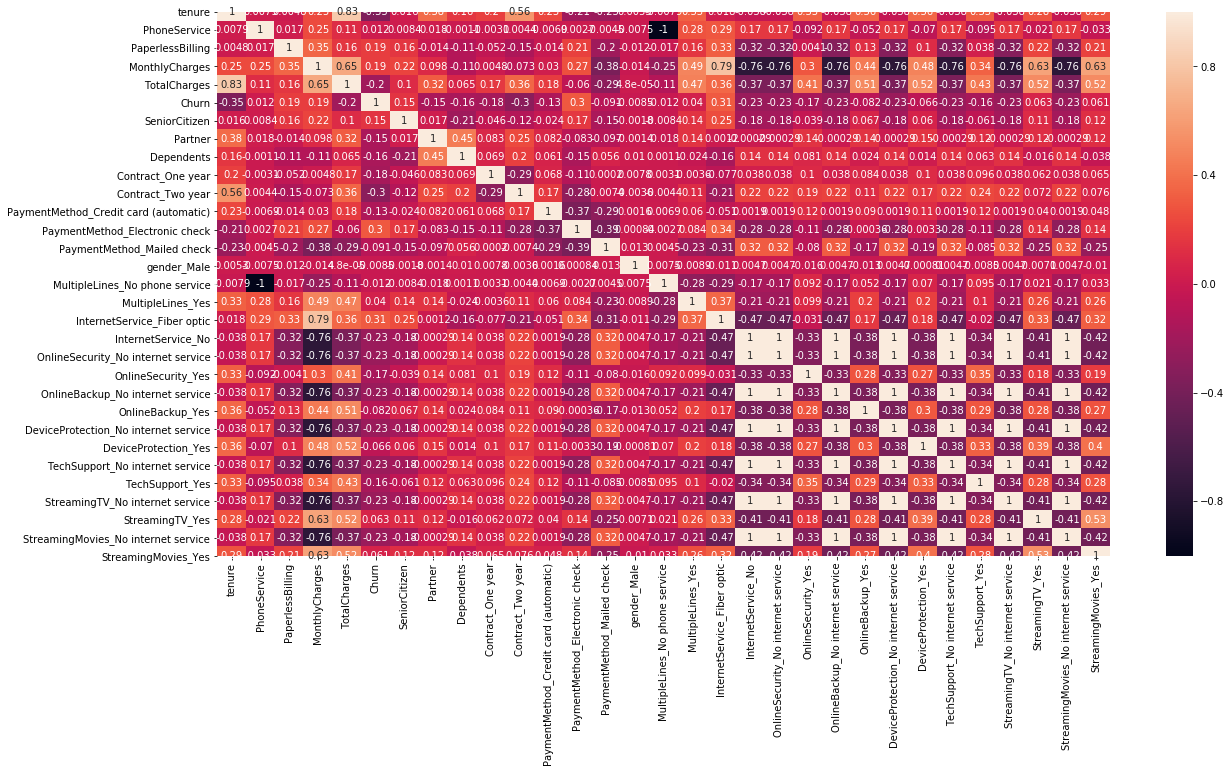

In [31]:
#Lets see the correlation matrix
plt.figure(figsize=(20,10))
sns.heatmap(telecom.corr(),annot=True)
plt.show()

### Step 7:Model Building

**Running your first Training Model**

In [32]:
import statsmodels.api as sm

In [33]:
#logistic regression model
logm1=sm.GLM(y_train,(sm.add_constant(X_train)),familiy=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Gaussian   Df Model:                           23
Link Function:               identity   Scale:                         0.13753
Method:                          IRLS   Log-Likelihood:                -2089.5
Date:                Sat, 10 Oct 2020   Deviance:                       673.60
Time:                        00:27:44   Pearson chi2:                     674.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.0163      0.104      0.156      0.876      -0.188       0.221
tenure                                   -0.0439      0.015     -3.004      0.003      -0.072      -0.015
PhoneService                              0.0634      0.012      5.326      0.000       0.040       0.087
PaperlessBilling                          0.0412      0.012      3.483      0.000       0.018       0.064
MonthlyCharges                           -0.1765      0.157     -1.127      0.260      -0.483       0.130
TotalCharges                             -0.1132      0.017     -6.491      0.000      -0.147      -0.079
SeniorCitizen                             0.0758      0.015      4.909      0.000       0.046       0.106
Partner                                   0.0046      0.013      0.357      0.721      -0.020       0.030
Dependents                               -0.0183      0.013     -1.361      0.174      -0.045       0.008
Contract_One year                        -0.1026      0.016     -6.267      0.000      -0.135      -0.071
Contract_Two year                        -0.0555      0.020     -2.742      0.006      -0.095      -0.016
PaymentMethod_Credit card (automatic)    -0.0242      0.016     -1.512      0.131      -0.056       0.007
PaymentMethod_Electronic check            0.0485      0.016      3.078      0.002       0.018       0.079
PaymentMethod_Mailed check               -0.0281      0.017     -1.640      0.101      -0.062       0.005
gender_Male                              -0.0055      0.011     -0.521      0.603      -0.026       0.015
MultipleLines_No phone service           -0.0471      0.105     -0.450      0.653      -0.252       0.158
MultipleLines_Yes                         0.0749      0.029      2.583      0.010       0.018       0.132
InternetService_Fiber optic               0.3227      0.130      2.474      0.013       0.067       0.578
InternetService_No                       -0.0452      0.019     -2.395      0.017      -0.082      -0.008
OnlineSecurity_No internet service       -0.0452      0.019     -2.395      0.017      -0.082      -0.008
OnlineSecurity_Yes                       -0.0136      0.030     -0.460      0.645      -0.072       0.044
OnlineBackup_No internet service         -0.0452      0.019     -2.395      0.017      -0.082      -0.008
OnlineBackup_Yes                          0.0084      0.029      0.288      0.774      -0.049       0.065
DeviceProtection_No internet service     -0.0452      0.019     -2.395      0.017      -0.082      -0.008
DeviceProtection_Yes                      0.0312      0.030      1.055      0.292      -0.027       0.089
TechSupport_No internet service          -0.0452      0.019     -2.395      0.017      -0.082      -0.008
TechSuppo

### Step 8:Feature Selection using RFE

In [34]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

**Using Recursive Feature elimination to narrow down our dataset to important 15 features**

In [35]:
from sklearn.feature_selection import RFE
rfe=RFE(logreg,15)
rfe=rfe.fit(X_train,y_train)

In [36]:
rfe.support_

array([ True,  True,  True, False,  True,  True, False, False,  True,
        True,  True, False,  True, False, False, False,  True,  True,
        True,  True, False, False, False, False, False,  True,  True,
       False, False, False])

In [37]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', True, 1),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', False, 13),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 15),
 ('Dependents', False, 11),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', True, 1),
 ('PaymentMethod_Electronic check', False, 8),
 ('PaymentMethod_Mailed check', True, 1),
 ('gender_Male', False, 14),
 ('MultipleLines_No phone service', False, 7),
 ('MultipleLines_Yes', False, 4),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('OnlineSecurity_No internet service', True, 1),
 ('OnlineSecurity_Yes', True, 1),
 ('OnlineBackup_No internet service', False, 3),
 ('OnlineBackup_Yes', False, 6),
 ('DeviceProtection_No internet service', False, 5),
 ('DeviceProtection_Yes', False, 16),
 ('TechSupport_No internet service', False, 9),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_No internet service', True, 1)

In [38]:
col=X_train.columns[rfe.support_]

In [39]:
X_train.columns[~rfe.support_]

Index(['MonthlyCharges', 'Partner', 'Dependents',
       'PaymentMethod_Electronic check', 'gender_Male',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes'],
      dtype='object')

**Assessing the model with StatsModels**

In [40]:
X_train_sm=sm.add_constant(X_train[col])
logm2=sm.GLM(y_train,X_train_sm,familiy=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Gaussian   Df Model:                           13
Link Function:               identity   Scale:                         0.13921
Method:                          IRLS   Log-Likelihood:                -2124.4
Date:                Sat, 10 Oct 2020   Deviance:                       683.22
Time:                        00:27:46   Pearson chi2:                     683.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.2797      0.023     11.928      0.000       0.234       0.326
tenure                                   -0.0686      0.014     -4.960      0.000      -0.096      -0.042
PhoneService                             -0.0107      0.021     -0.517      0.605      -0.051       0.030
PaperlessBilling                          0.0502      0.012      4.240      0.000       0.027       0.073
TotalCharges                             -0.0679      0.015     -4.603      0.000      -0.097      -0.039
SeniorCitizen                             0.0856      0.015      5.605      0.000       0.056       0.115
Contract_One year                        -0.1040      0.016     -6.375      0.000      -0.136      -0.072
Contract_Two year                        -0.0493      0.020     -2.457      0.014      -0.089      -0.010
PaymentMethod_Credit card (automatic)    -0.0537      0.014     -3.857      0.000      -0.081      -0.026
PaymentMethod_Mailed check               -0.0682      0.015     -4.611      0.000      -0.097      -0.039
InternetService_Fiber optic               0.1882      0.016     11.497      0.000       0.156       0.220
InternetService_No                       -0.0619      0.007     -9.061      0.000      -0.075      -0.048
OnlineSecurity_No internet service       -0.0619      0.007     -9.061      0.000      -0.075      -0.048
OnlineSecurity_Yes                       -0.0595      0.014     -4.184      0.000      -0.087      -0.032
TechSupport_Yes                          -0.0535      0.014     -3.713      0.000      -0.082      -0.025
StreamingTV_No internet service          -0.0619      0.007     -9.061      0.000      -0.075      -0.048
=========================================================================================================
"""

In [41]:
# Getting the predicted values on the train set
y_train_pred=res.predict(X_train_sm)
y_train_pred[:10]

879     0.336632
5790    0.316663
6498    0.661832
880     0.494825
2784    0.590488
3874    0.441537
5387    0.371106
6623    0.747559
4465    0.253262
5364    0.515185
dtype: float64

In [42]:
y_train_pred=y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.33663215, 0.31666293, 0.66183238, 0.49482517, 0.59048754,
       0.44153739, 0.37110554, 0.74755949, 0.25326227, 0.51518549])

**Creating a dataframe with the actual churn flag and the predicted probabilities**

In [43]:
y_train_pred_final=pd.DataFrame({'Churn':y_train.values,'Churn_Prob':y_train_pred})
y_train_pred_final['CustID']=y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.336632,879
1,0,0.316663,5790
2,1,0.661832,6498
3,1,0.494825,880
4,1,0.590488,2784


**Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0**

In [44]:
y_train_pred_final['predicted']=y_train_pred_final['Churn_Prob'].map(lambda x : 1 if x>0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.336632,879,0
1,0,0.316663,5790,0
2,1,0.661832,6498,1
3,1,0.494825,880,0
4,1,0.590488,2784,1


In [45]:
from sklearn import metrics

In [46]:
#confusion matrix

confusion=metrics.confusion_matrix(y_train_pred_final['Churn'],y_train_pred_final['predicted'])
confusion

array([[3293,  342],
       [ 653,  634]], dtype=int64)

In [47]:
# Predicted     not_churn    churn
# Actual
# not_churn        3270      365
# churn            579       708  

In [48]:
#Lets check overall acurracy
print(metrics.accuracy_score(y_train_pred_final['Churn'],y_train_pred_final['predicted']))

0.7978464039008533


**Checking VIF's**

In [49]:
#check the VIF values of the feature variable
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
#Create a dataframe that will contain name of all feature variables and their respective VIF's
vif=pd.DataFrame()
vif['Features']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
10,InternetService_No,inf
11,OnlineSecurity_No internet service,inf
14,StreamingTV_No internet service,inf
1,PhoneService,7.84
3,TotalCharges,6.72
0,tenure,6.66
9,InternetService_Fiber optic,3.91
6,Contract_Two year,3.21
2,PaperlessBilling,2.59
13,TechSupport_Yes,2.06


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'PhoneService' has the highest VIF. So let's start by dropping that.

In [51]:
col = col.drop(['PhoneService','InternetService_No','OnlineSecurity_No internet service','StreamingTV_No internet service'], 1)
col

Index(['tenure', 'PaperlessBilling', 'TotalCharges', 'SeniorCitizen',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'OnlineSecurity_Yes', 'TechSupport_Yes'],
      dtype='object')

In [52]:
#Dropping ['InternetService_No','OnlineSecurity_No internet service','StreamingTV_No internet service'] from Test Set

X_test=X_test.drop(['InternetService_No','OnlineSecurity_No internet service','StreamingTV_No internet service'], 1)

In [53]:
#Lets re run the model using the selected variable
X_train_sm=sm.add_constant(X_train[col])
logm3=sm.GLM(y_train,X_train_sm,familiy=sm.families.Binomial())
res=logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4910
Model Family:                Gaussian   Df Model:                           11
Link Function:               identity   Scale:                         0.14195
Method:                          IRLS   Log-Likelihood:                -2173.4
Date:                Sat, 10 Oct 2020   Deviance:                       696.97
Time:                        00:27:48   Pearson chi2:                     697.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.2122      0.017     12.634      0.000       0.179       0.245
tenure                                   -0.0959      0.013     -7.150      0.000      -0.122      -0.070
PaperlessBilling                          0.0666      0.012      5.616      0.000       0.043       0.090
TotalCharges                             -0.0308      0.014     -2.203      0.028      -0.058      -0.003
SeniorCitizen                             0.0935      0.015      6.075      0.000       0.063       0.124
Contract_One year                        -0.1326      0.016     -8.183      0.000      -0.164      -0.101
Contract_Two year                        -0.0981      0.020     -4.997      0.000      -0.137      -0.060
PaymentMethod_Credit card (automatic)    -0.0607      0.014     -4.326      0.000      -0.088      -0.033
PaymentMethod_Mailed check               -0.0968      0.015     -6.615      0.000      -0.126      -0.068
InternetService_Fiber optic               0.2092      0.016     13.271      0.000       0.178       0.240
OnlineSecurity_Yes                       -0.0205      0.014     -1.482      0.138      -0.047       0.007
TechSupport_Yes                          -0.0122      0.014     -0.876      0.381      -0.040       0.015
=========================================================================================================
"""

In [54]:
y_train_pred=res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.28537298, 0.25291989, 0.64134581, 0.56038302, 0.61312027,
       0.3964545 , 0.34117226, 0.73489951, 0.16250749, 0.49345344])

In [55]:
y_train_pred_final['Churn_Prob']=y_train_pred

In [56]:
#creating new column predicted with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted']=y_train_pred_final['Churn_Prob'].map(lambda x : 1 if x>0.5 else 0)

In [57]:
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.285373,879,0
1,0,0.252920,5790,0
2,1,0.641346,6498,1
3,1,0.560383,880,1
4,1,0.613120,2784,1


In [58]:
print(metrics.accuracy_score(y_train_pred_final.Churn,y_train_pred_final.predicted))

0.7988622511174319


So Overall acurracy hasn't dropped much

In [59]:
#Lets check the VIF again
vif=pd.DataFrame()
vif['Features']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i) for i in range (X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,tenure,6.19
2,TotalCharges,5.58
8,InternetService_Fiber optic,2.56
5,Contract_Two year,2.55
1,PaperlessBilling,2.34
10,TechSupport_Yes,1.89
9,OnlineSecurity_Yes,1.73
4,Contract_One year,1.59
7,PaymentMethod_Mailed check,1.50
6,PaymentMethod_Credit card (automatic),1.41


In [60]:
col=col.drop('tenure')
col

Index(['PaperlessBilling', 'TotalCharges', 'SeniorCitizen',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'OnlineSecurity_Yes', 'TechSupport_Yes'],
      dtype='object')

In [61]:
X_train_sm=sm.add_constant(X_train[col])
logm4=sm.GLM(y_train,X_train_sm,familiy=sm.families.Binomial())
res=logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4911
Model Family:                Gaussian   Df Model:                           10
Link Function:               identity   Scale:                         0.14340
Method:                          IRLS   Log-Likelihood:                -2198.9
Date:                Sat, 10 Oct 2020   Deviance:                       704.23
Time:                        00:27:49   Pearson chi2:                     704.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.2016      0.017     11.989      0.000       0.169       0.235
PaperlessBilling                          0.0685      0.012      5.753      0.000       0.045       0.092
TotalCharges                             -0.1101      0.009    -12.828      0.000      -0.127      -0.093
SeniorCitizen                             0.0904      0.015      5.844      0.000       0.060       0.121
Contract_One year                        -0.1651      0.016    -10.558      0.000      -0.196      -0.134
Contract_Two year                        -0.1638      0.017     -9.389      0.000      -0.198      -0.130
PaymentMethod_Credit card (automatic)    -0.0629      0.014     -4.458      0.000      -0.091      -0.035
PaymentMethod_Mailed check               -0.0807      0.015     -5.553      0.000      -0.109      -0.052
InternetService_Fiber optic               0.2540      0.015     17.470      0.000       0.225       0.282
OnlineSecurity_Yes                       -0.0088      0.014     -0.638      0.523      -0.036       0.018
TechSupport_Yes                           0.0092      0.014      0.669      0.503      -0.018       0.036
=========================================================================================================
"""

In [62]:
y_train_pred=res.predict(X_train_sm).values.reshape(-1)

In [63]:
y_train_pred[:10]

array([0.3005125 , 0.28248566, 0.63131844, 0.58504233, 0.62523765,
       0.36165375, 0.31626718, 0.72195514, 0.14230537, 0.4948725 ])

In [64]:
y_train_pred_final['Churn_Prob']=y_train_pred

In [65]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted']=y_train_pred_final['Churn_Prob'].map(lambda x : 1 if x >0.5 else 0)

In [66]:
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.300513,879,0
1,0,0.282486,5790,0
2,1,0.631318,6498,1
3,1,0.585042,880,1
4,1,0.625238,2784,1


In [67]:
print(metrics.accuracy_score(y_train_pred_final['Churn'],y_train_pred_final['predicted']))

0.794392523364486


Accuracy is still practically same.

**Lets check the VIF again.**

In [68]:
vif=pd.DataFrame()
vif['Features']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[-1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,PaperlessBilling,2.34
7,InternetService_Fiber optic,2.10
9,TechSupport_Yes,1.81
4,Contract_Two year,1.72
8,OnlineSecurity_Yes,1.72
1,TotalCharges,1.68
6,PaymentMethod_Mailed check,1.47
5,PaymentMethod_Credit card (automatic),1.41
3,Contract_One year,1.39
2,SeniorCitizen,1.29


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [69]:
#Lets look at the confusion matrix again
confusion=metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted)
confusion

array([[3271,  364],
       [ 648,  639]], dtype=int64)

In [70]:
#Lets look at the Overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Churn,y_train_pred_final.predicted))

0.794392523364486


### Let's check other metrices for verifying model performance

In [71]:
TP=confusion[1,1] #true positive
TN=confusion[0,0] #true negartive
FP=confusion[0,1] #false positive
FN=confusion[1,0] #false negative

In [72]:
#Let's see the sensitivity of our logistic regression model
TP/(TP+FN)

0.4965034965034965

In [73]:
#Let's see specivity
TN/(TN+FP)

0.8998624484181568

In [74]:
# Calculate false postive rate - predicting churn when customer does not have churned
FP/(FP+TN)

0.10013755158184319

In [75]:
#postive predictive value
TP/(TP+FP)

0.6370887337986042

In [76]:
#negative prdictive value
TN/(TN+FN)

0.8346516968614442

## Step 8: Plotting ROC Curve
It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).

In [77]:
def draw_roc(actual ,probs):
    fpr,tpr,thresholds=metrics.roc_curve(actual,probs,drop_intermediate=True)
    
    auc_score=metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5,5))
    
    plt.plot(fpr,tpr,label='ROC Curve (area=%0.2f)'%auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    
    plt.xlim([0,1])
    plt.ylim([0,1.05])
    
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    return None
    
    

In [78]:
 fpr,tpr,thresholds=metrics.roc_curve(y_train_pred_final['Churn'],y_train_pred_final['Churn_Prob'],drop_intermediate=True)

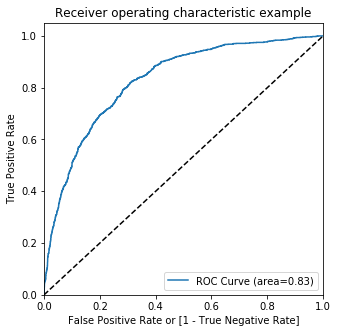

In [79]:
draw_roc(y_train_pred_final['Churn'],y_train_pred_final['Churn_Prob'])

### Step 10: Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [80]:
# Let's create columns with different probability cutoffs 
numbers=[float(x)/10 for x in range(10)]

for i in numbers:
    y_train_pred_final[i]=y_train_pred_final['Churn_Prob'].map(lambda x :1 if x>i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.300513,879,0,1,1,1,1,0,0,0,0,0,0
1,0,0.282486,5790,0,1,1,1,0,0,0,0,0,0,0
2,1,0.631318,6498,1,1,1,1,1,1,1,1,0,0,0
3,1,0.585042,880,1,1,1,1,1,1,1,0,0,0,0
4,1,0.625238,2784,1,1,1,1,1,1,1,1,0,0,0


In [81]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.361235  0.985237  0.140303
0.1   0.1  0.535961  0.954157  0.387895
0.2   0.2  0.636733  0.913753  0.538652
0.3   0.3  0.739130  0.766123  0.729574
0.4   0.4  0.784844  0.620824  0.842916
0.5   0.5  0.794393  0.496503  0.899862
0.6   0.6  0.782812  0.260295  0.967813
0.7   0.7  0.750305  0.055167  0.996424
0.8   0.8  0.738521  0.000000  1.000000
0.9   0.9  0.738521  0.000000  1.000000


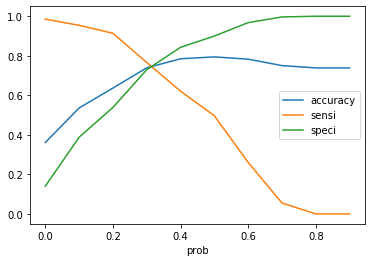

In [82]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

**From the curve above, 0.3 is the optimum point to take it as a cutoff probability.**

In [83]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.300513,879,0,1,1,1,1,0,0,0,0,0,0,1
1,0,0.282486,5790,0,1,1,1,0,0,0,0,0,0,0,0
2,1,0.631318,6498,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.585042,880,1,1,1,1,1,1,1,0,0,0,0,1
4,1,0.625238,2784,1,1,1,1,1,1,1,1,0,0,0,1


In [84]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.7391304347826086

In [85]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[2652,  983],
       [ 301,  986]], dtype=int64)

In [86]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [87]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7661227661227661

In [88]:
# Let us calculate specificity
TN / float(TN+FP)

0.7295735900962861

### Step 11:Making predictions on the test set

In [89]:
X_test[['tenure','MonthlyCharges','TotalCharges']] = scaler.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])

In [90]:
X_test = X_test[col]
X_test.head()

,PaperlessBilling,TotalCharges,SeniorCitizen,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,InternetService_Fiber optic,OnlineSecurity_Yes,TechSupport_Yes
942,1,-0.128378,0,0,0,1,0,1,0,0
3730,1,1.600302,0,0,0,1,0,1,0,0
1761,1,-0.343297,0,0,1,1,0,0,0,0
2283,1,-0.979170,0,0,0,0,1,1,0,0
1872,0,-0.656086,0,0,1,0,0,0,0,0


In [91]:
X_test_sm = sm.add_constant(X_test)

In [92]:
y_test_pred = res.predict(X_test_sm)

In [93]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [94]:
# Let's see the head
y_pred_1.head()

,0
942,0.475273
3730,0.284963
1761,0.081146
2283,0.551101
1872,0.109990


In [95]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [96]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [97]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [98]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [99]:
y_pred_final.head()

,Churn,CustID,0
0,0,942,0.475273
1,1,3730,0.284963
2,0,1761,0.081146
3,1,2283,0.551101
4,0,1872,0.109990


In [100]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [101]:
# Rearranging the columns
#y_pred_final = y_pred_final.reindex_axis(['CustID','Churn','Churn_Prob'], axis=1)
y_pred_final = y_pred_final.reindex(['CustID', 'Churn', 'Churn_Prob'], axis = 1)

In [102]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Churn,Churn_Prob
0,942,0,0.475273
1,3730,1,0.284963
2,1761,0,0.081146
3,2283,1,0.551101
4,1872,0,0.109990


In [103]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [104]:
y_pred_final.head()

,CustID,Churn,Churn_Prob,final_predicted
0,942,0,0.475273,1
1,3730,1,0.284963,0
2,1761,0,0.081146,0
3,2283,1,0.551101,1
4,1872,0,0.109990,0


In [105]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.7644549763033175

In [106]:
confusion2 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion2

array([[1293,  235],
       [ 262,  320]], dtype=int64)

In [107]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [108]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5498281786941581

In [109]:
# Let us calculate specificity
TN / float(TN+FP)

0.8462041884816754

### Conclusion :
We can see that with 0.3 as optimal cutoff the sensitivity has increased significantly. The descision of what cutoff to take is entirely business driven , i.e, which we want maximize either sensitivity or specificity to serve our requirement.